### TTim example of pumping test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ttim import *

Load data of two observation wells

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
to1 = drawdown[:,0] / 60 / 24
ho1 = -drawdown[:,1]
ro1 = 30

drawdown = np.loadtxt('data/oudekorendijk_h90.dat')
to2 = drawdown[:,0] / 60 / 24
ho2 = -drawdown[:,1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the sum of squared residuals at the optimum.

In [5]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

............................[[Fit Statistics]]
    # function evals   = 28
    # data points      = 34
    # variables        = 2
    chi-square         = 0.034
    reduced chi-square = 0.001
    Akaike info crit   = -230.788
    Bayesian info crit = -227.735
[[Variables]]
    kaq0:   68.6392795 +/- 1.438083 (2.10%) (init= 10)
    Saq0:   1.6072e-05 +/- 1.58e-06 (9.84%) (init= 0.0001)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.891 


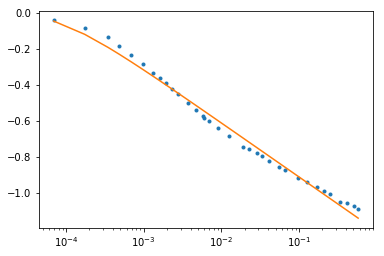

In [6]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model')

### Specify $S$ rather than $S_s$

In [7]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='S', par=ml.aq.Saq, layer=0, initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

...............................[[Fit Statistics]]
    # function evals   = 31
    # data points      = 34
    # variables        = 2
    chi-square         = 0.034
    reduced chi-square = 0.001
    Akaike info crit   = -230.787
    Bayesian info crit = -227.734
[[Variables]]
    kaq0:   68.6407549 +/- 1.438564 (2.10%) (init= 10)
    S:      0.00011249 +/- 1.11e-05 (9.85%) (init= 0.0001)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, S)                   = -0.891 


### Add wellbore storage

In [8]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.parameter(name='rc', par=w.rc, initial=0.2, pmin=0, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit()

......................................[[Fit Statistics]]
    # function evals   = 38
    # data points      = 34
    # variables        = 3
    chi-square         = 0.008
    reduced chi-square = 0.000
    Akaike info crit   = -276.765
    Bayesian info crit = -272.186
[[Variables]]
    kaq0:   80.5250053 +/- 1.711534 (2.13%) (init= 10)
    Saq0:   5.6660e-06 +/- 8.11e-07 (14.32%) (init= 0.0001)
    rc:     0.28461548 +/- 0.016775 (5.89%) (init= 0.2)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.974 
    C(Saq0, rc)                  = -0.867 
    C(kaq0, rc)                  =  0.825 


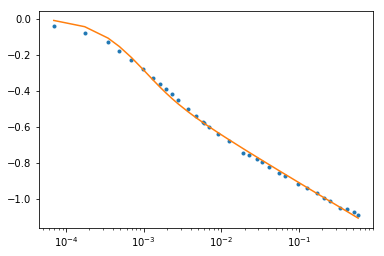

In [10]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model')

### Two observation wells

In [11]:
cal = Calibrate(ml)
cal.parameter(name='kaq0', initial=10)
cal.parameter(name='Saq0', initial=1e-4)
cal.parameter(name='rc', par=w.rc, initial=0.2, pmin=0, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit()

............................................................[[Fit Statistics]]
    # function evals   = 60
    # data points      = 69
    # variables        = 3
    chi-square         = 0.173
    reduced chi-square = 0.003
    Akaike info crit   = -407.245
    Bayesian info crit = -400.543
[[Variables]]
    kaq0:   66.0938061 +/- 1.712317 (2.59%) (init= 10)
    Saq0:   2.5401e-05 +/- 2.47e-06 (9.74%) (init= 0.0001)
    rc:     1.2732e-09 +/- 0.009670 (759526171.37%) (init= 0.2)
[[Correlations]] (unreported correlations are <  0.100)
    C(kaq0, Saq0)                = -0.862 
    C(kaq0, rc)                  =  0.227 
    C(Saq0, rc)                  = -0.210 


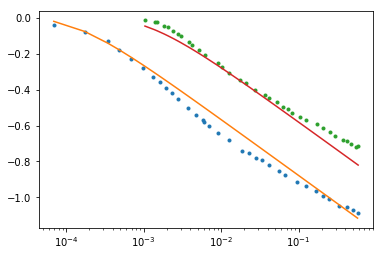

In [12]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='obs1')
plt.semilogx(to1, h1[0], label='model')
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, '.', label='obs2')
plt.semilogx(to2, h2[0], label='model')